# HEART FAILURE PREDICTION


In [1]:
# Data clearnning and EDA
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns

## I. Exploratory Data Analysis

In [2]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 1. Overview on data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
categorical_features = ['anaemia', 'diavbetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [6]:
data[numerical_features].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


##### Age

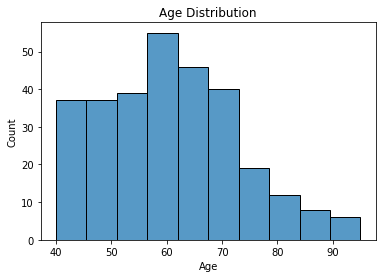

In [23]:
sns.histplot(x=data.age)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

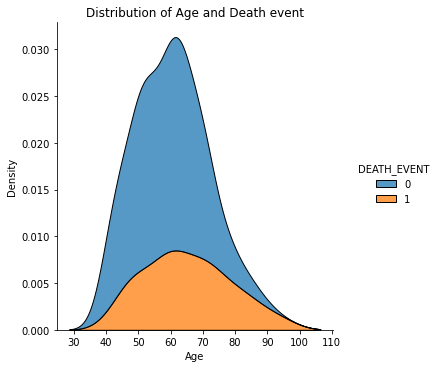

In [43]:
sns.displot(data=data, x="age", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of Age and Death event')
plt.xlabel('Age')
plt.show() 

##### Ejection fraction

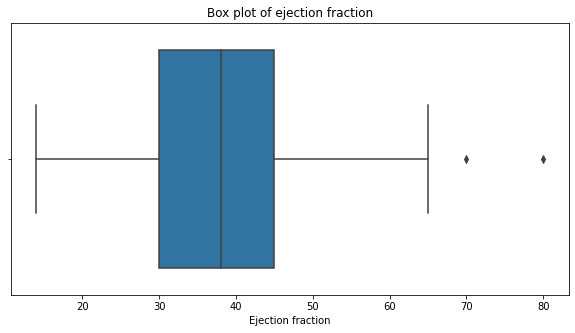

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=data.ejection_fraction, ax=ax)
plt.title('Box plot of ejection fraction')
plt.xlabel('Ejection fraction')
plt.show()

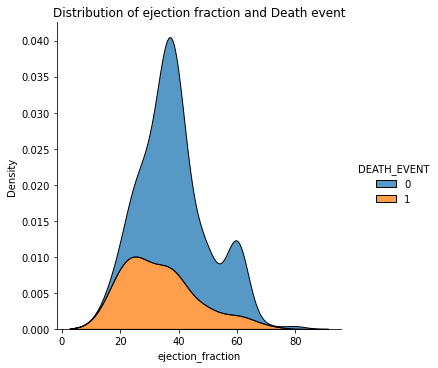

In [44]:
sns.displot(data=data, x="ejection_fraction", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of ejection fraction and Death event')
plt.xlabel('ejection_fraction')
plt.show()

##### Creatinine phosphokinase

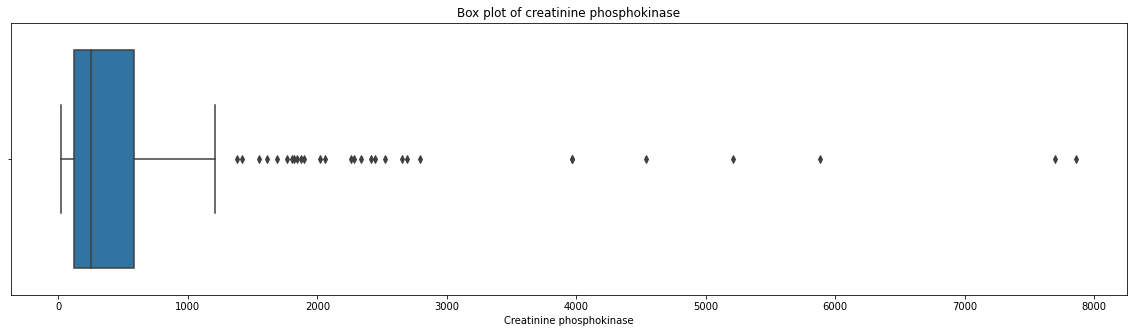

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.creatinine_phosphokinase, ax=ax)
plt.title('Box plot of creatinine phosphokinase')
plt.xlabel('Creatinine phosphokinase')
plt.show()

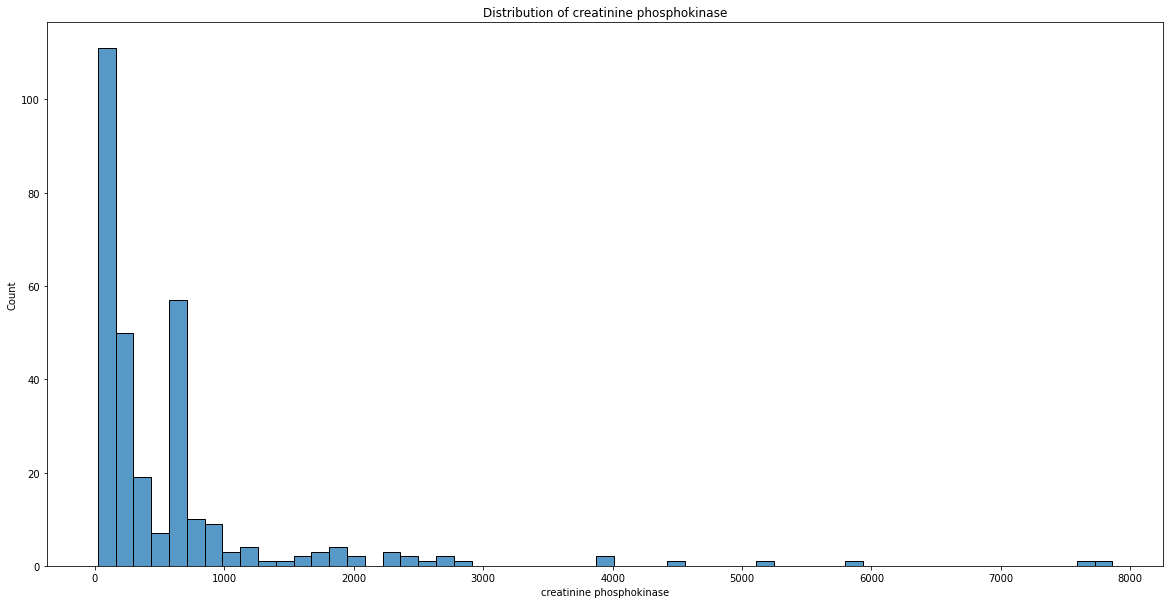

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(x=data.creatinine_phosphokinase, ax=ax)
plt.title('Distribution of creatinine phosphokinase')
plt.xlabel('creatinine phosphokinase')

plt.show()

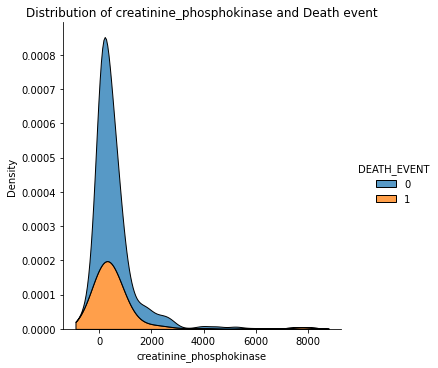

In [46]:
sns.displot(data=data, x="creatinine phosphokinase", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of creatinine phosphokinase and Death event')
plt.xlabel('creatinine_phosphokinase')
plt.show()

##### Plateletes

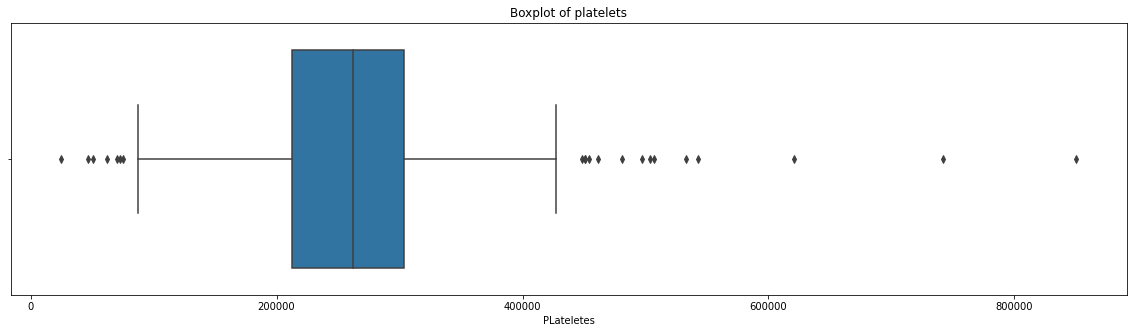

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.platelets, ax=ax)
plt.title('Boxplot of platelets')
plt.xlabel('Plateletes')
plt.show()

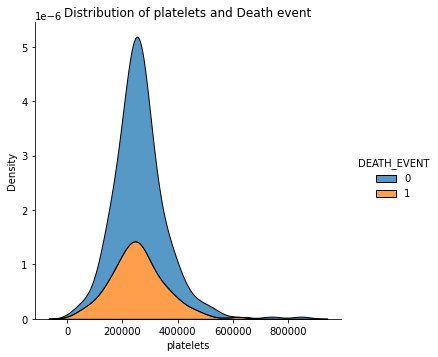

In [48]:
sns.displot(data=data, x="platelets", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of platelets and Death event')
plt.xlabel('platelets')
plt.show()

##### Serum creatinine

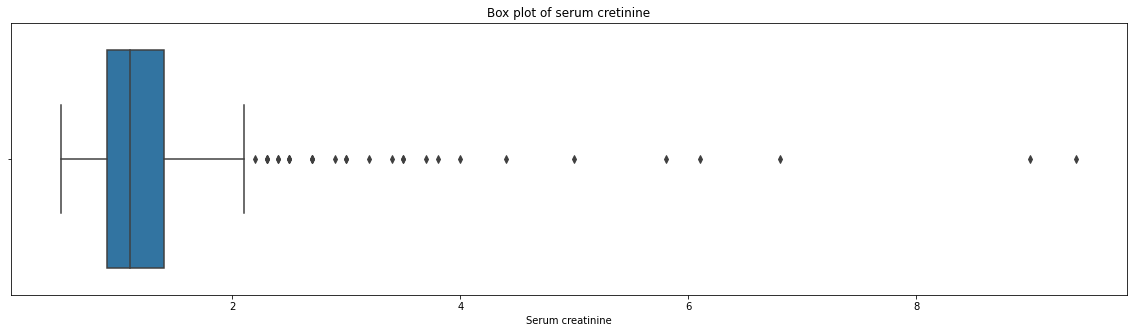

In [12]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.serum_creatinine, ax=ax)
plt.title('Box plot of serum cretinine')
plt.xlabel('Serum creatinine')
plt.show()

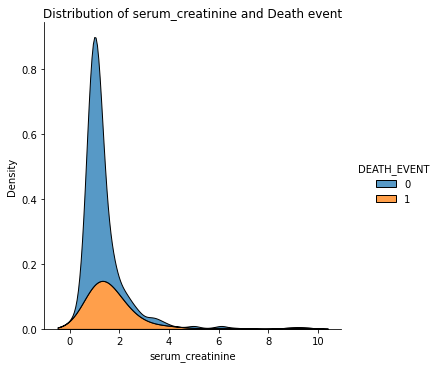

In [51]:
sns.displot(data=data, x="serum_creatinine", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of serum_creatinine and Death event')
plt.xlabel('serum_creatinine')
plt.show()

##### Seruim sodium

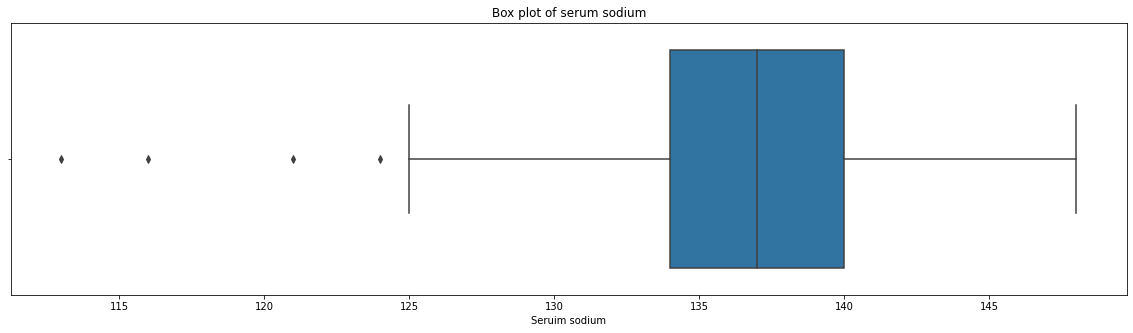

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.serum_sodium, ax=ax)
plt.title('Box plot of serum sodium')
plt.xlabel('Seruim sodium')
plt.show()

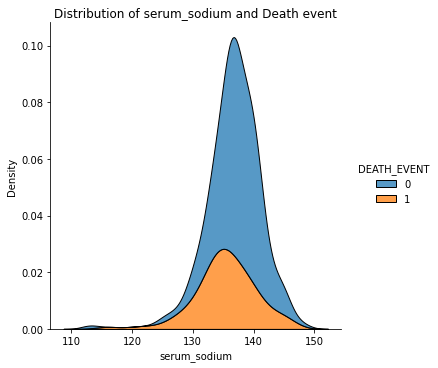

In [52]:
sns.displot(data=data, x="serum_sodium", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of serum_sodium and Death event')
plt.xlabel('serum_sodium')
plt.show()

##### Time

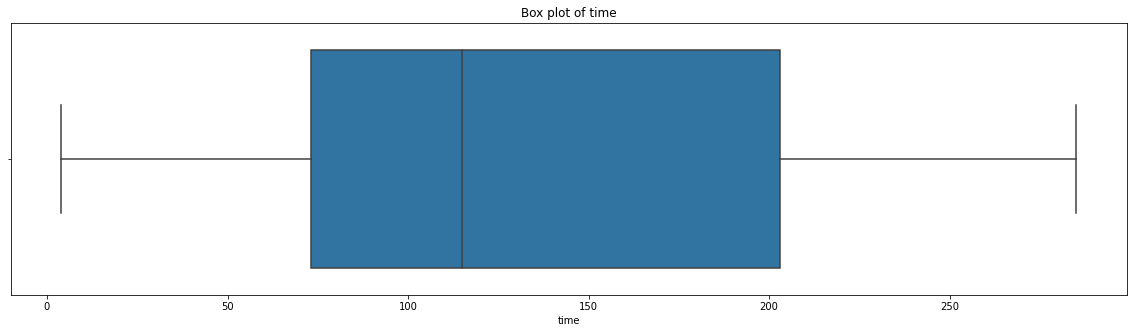

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.time, ax=ax)
plt.title('Box plot of time')
plt.show()

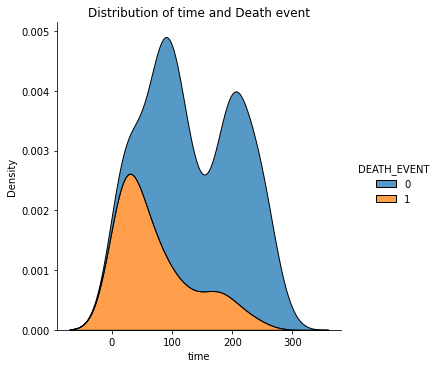

In [53]:
sns.displot(data=data, x="time", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of time and Death event')
plt.xlabel('time')
plt.show()

#### Categorical features

##### Anaemia

Text(0.5, 1.0, 'The number of people has and do not have anaemia')

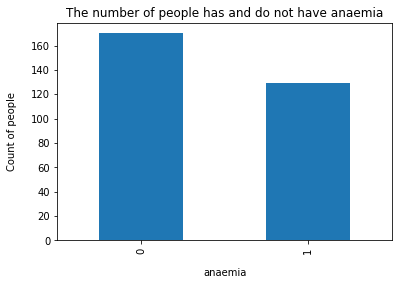

In [15]:
data['anaemia'].value_counts().plot(kind='bar')
plt.xlabel("anaemia", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('The number of people has and do not have anaemia')

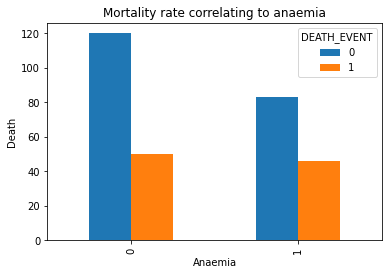

In [29]:
pd.crosstab(data.anaemia  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to anaemia')
plt.xlabel('Anaemia')
plt.ylabel('Death')
plt.show()

##### Diabetes

Text(0.5, 1.0, 'The number of people has and do not have diabetes')

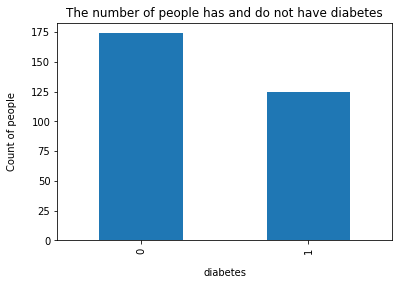

In [16]:
data['diabetes'].value_counts().plot(kind='bar')
plt.xlabel("diabetes", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('The number of people has and do not have diabetes')

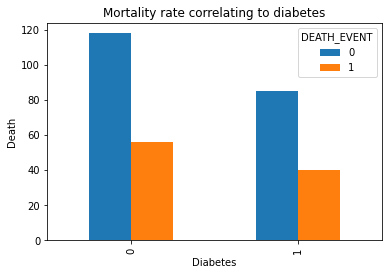

In [32]:
pd.crosstab(data.diabetes  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Death')
plt.show()

##### High blood pressure

Text(0.5, 1.0, 'The number of people with or without high_blood_pressure')

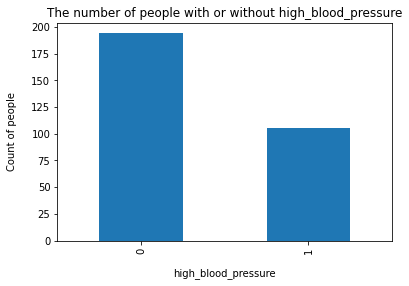

In [17]:
data['high_blood_pressure'].value_counts().plot(kind='bar')
plt.xlabel("high_blood_pressure", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('The number of people with or without high_blood_pressure')

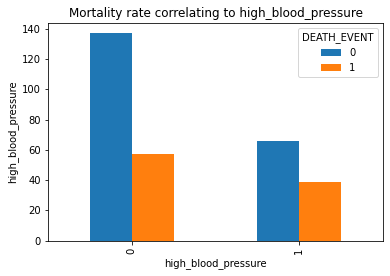

In [31]:
pd.crosstab(data.high_blood_pressure  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to high_blood_pressure')
plt.ylabel('high_blood_pressure')
plt.show()

##### Gender

Text(0.5, 1.0, 'Number of male and female')

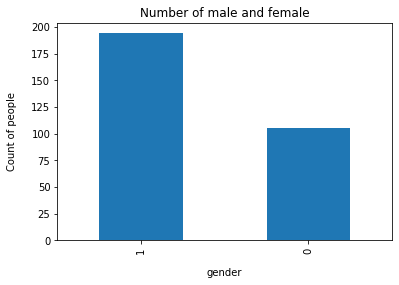

In [18]:
data['sex'].value_counts().plot(kind='bar')
plt.xlabel("gender", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('Number of male and female')

##### Smoking

Text(0.5, 1.0, 'Number of patient smoke')

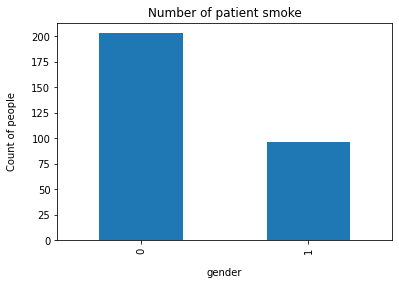

In [19]:
data['smoking'].value_counts().plot(kind='bar')
plt.xlabel("gender", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('Number of patient smoke')

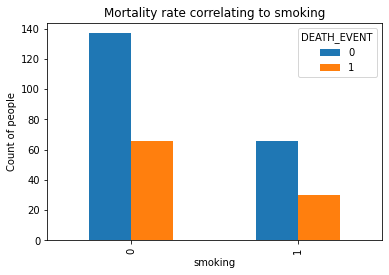

In [34]:
pd.crosstab(data.smoking  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to smoking')
plt.ylabel('Count of people')
plt.show()

##### Death event

Text(0.5, 1.0, 'Number of death patients')

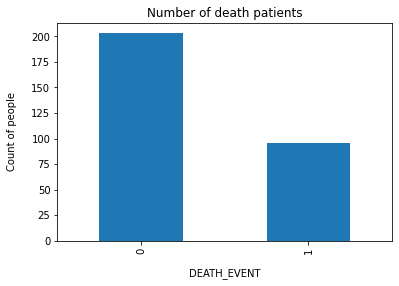

In [20]:
data['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.xlabel("DEATH_EVENT", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('Number of death patients')

#### 3. The patients’ age and sex affect the their health’s indicators 



#### 5. Is health indices affect the mortality rate of patients?



## Predictive analysis

In [21]:
# Import ML library
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### Data preprocessing 

* Remove outlier
* Balance data set


### Evaluation Framework